In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os

# List all files in the default directory
for root, dirs, files in os.walk('/'):
    for name in files:
        if 'cameraman' in name or 'brightening' in name:
            print(os.path.join(root, name))


/content/brightening.png
/content/selective brightening.png
/content/cameraman.png


# Loading the Images and its Shape

In [ ]:
img_original = cv2.imread('/content/cameraman.png', cv2.IMREAD_GRAYSCALE)
img_brightened = cv2.imread('/content/brightening.png', cv2.IMREAD_GRAYSCALE)
img_target = cv2.imread('/content/selective brightening.png', cv2.IMREAD_GRAYSCALE)

In [ ]:
print("Shape of img_original:", img_original.shape if img_original is not None else "None")
print("Shape of img_brightened:", img_brightened.shape if img_brightened is not None else "None")
print("Shape of img_target:", img_target.shape if img_target is not None else "None")

Shape of img_original: (478, 479)
Shape of img_brightened: (488, 487)
Shape of img_target: (482, 480)


# Display Images

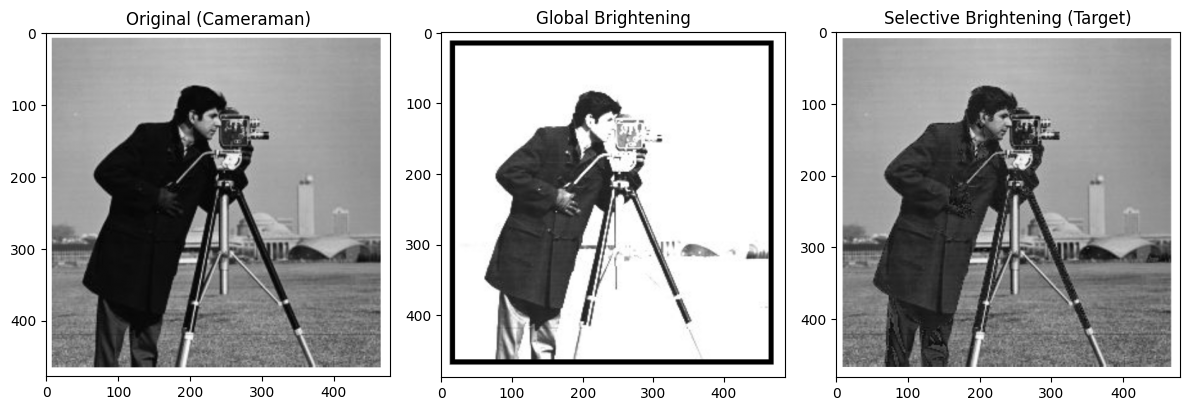

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.imshow(img_original, cmap='gray')
plt.title("Original (Cameraman)")

plt.subplot(1,3,2)
plt.imshow(img_brightened, cmap='gray')
plt.title("Global Brightening")

plt.subplot(1,3,3)
plt.imshow(img_target, cmap='gray')
plt.title("Selective Brightening (Target)")

plt.tight_layout()
plt.show()

# Create a Mask for Brightening

use thresholding to create a mask for background and face (regions to brighten) and exclude the coat (which is already bright).

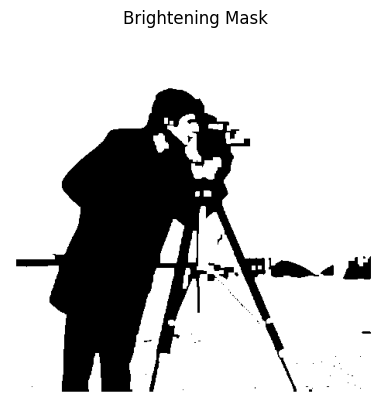

In [ ]:
# Automatically create a mask by brightening non-dark areas
_, mask = cv2.threshold(img_original, 80, 255, cv2.THRESH_BINARY)

# applyin this operations to smooth the mask
kernel = np.ones((5,5), np.uint8)
mask_clean = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Visualizing the mask
plt.imshow(mask_clean, cmap='gray')
plt.title("Brightening Mask")
plt.axis('off')
plt.show()

# Apply Selective Brightening

We’ll apply brightness only where the mask is white (non-coat areas)

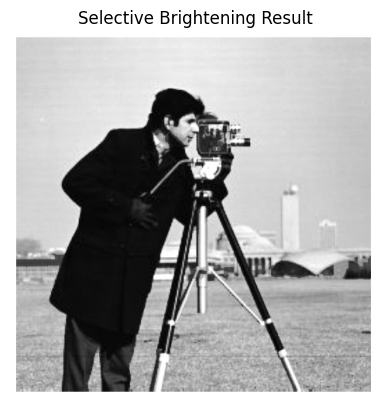

In [ ]:
# Converting to float32 for safe pixel operations
img_float = img_original.astype(np.float32)

# Increasing brightness in masked areas
brightened_selective = img_float.copy()
brightened_selective[mask_clean == 255] += 50  # Increase brightness

# Clip values to 0-255 and convert back to uint8
brightened_selective = np.clip(brightened_selective, 0, 255).astype(np.uint8)

# Show the result
plt.imshow(brightened_selective, cmap='gray')
plt.title("Selective Brightening Result")
plt.axis('off')
plt.show()

# Comparing All Outputs

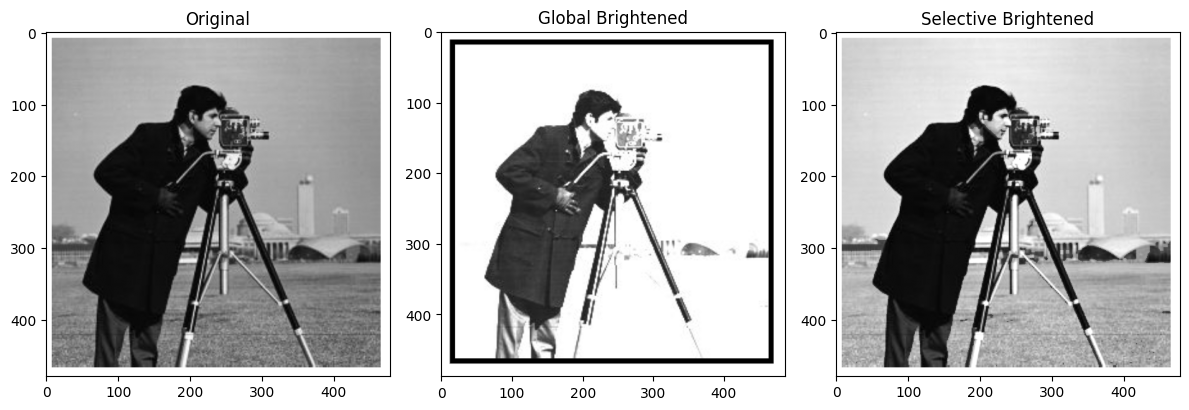

In [ ]:
plt.figure(figsize=(12,4))

#first image -cameraman.png
plt.subplot(1,3,1)
plt.imshow(img_original, cmap='gray')
plt.title("Original")

#second image-brightening.pnh(over-brightened imgage)
plt.subplot(1,3,2)
plt.imshow(img_brightened, cmap='gray')
plt.title("Global Brightened")

#desired output
plt.subplot(1,3,3)
plt.imshow(brightened_selective, cmap='gray')
plt.title("Selective Brightened")

plt.tight_layout()
plt.show()